Mon matériau est le CsPrS2

Pour construire la structure de la maille avec chaque atome, on récupère d'abord les coordonnées cartésiennes des atomes d'une molécule :
[PeriodicSite: S (4.6761, 2.8223, 17.9232) [0.7708, 0.7708, 0.7708], PeriodicSite: S (1.3901, 0.8390, 5.3282) [0.2292, 0.2292, 0.2292], PeriodicSite: Cs (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000], PeriodicSite: Pr (3.0331, 1.8307, 11.6257) [0.5000, 0.5000, 0.5000]]
On récupère les points de la maille pour pouvoir réaliser des opérations sur tous les atomes de la maille
La position d'un atome dans une maille peut s'écrire : a*r_a + b*r_b + c*r_c + r' où r' représente la position de l'atome dans le motif et r_a,r_b,r_c les vecteurs de bases de la maille

r_a =  [ 4.14351009e+00 -3.17507000e-03  7.38966906e+00]
r_b =  [1.92792904 3.66766623 7.38966906]
r_c =  [-5.26055000e-03 -3.17507000e-03  8.47206332e+00]
en coordonnées cartésiennes, pour la suite nous travaillerons dans les coordonnées réduites pour les différents 

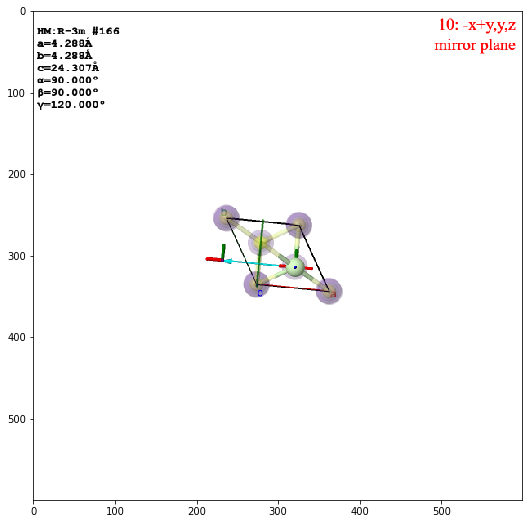

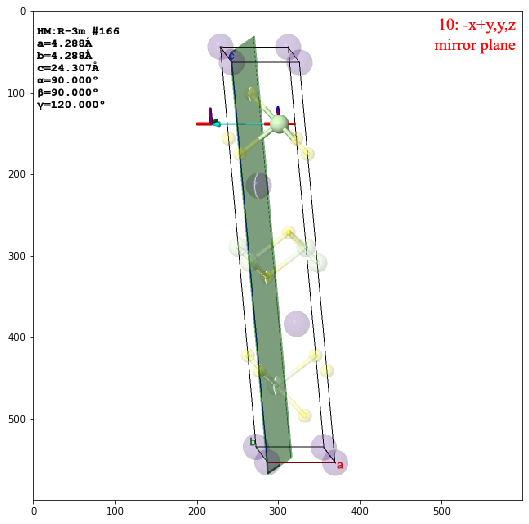


Seconde opération de symétrie :

Rotation hélicoïdale de [0 0 1/3] et de 120°, notée 3_1 appliquée à l'atome de praséodyme (Pr) situé en v = [1 1 1/2]
L'équation mathématique associée peut-être écrite comme suit :
v' =  [[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]] *v +  [0.66666667 0.33333333 0.33333333]
En appliquant la rotation puis la translation, on s'aperçoit bien que l'atome est situé sur un autre site de Pr situé en v' = [2/3 1/3 83/100] (soit le site de départ de la symétrie précédente) dans la maille adjacente.


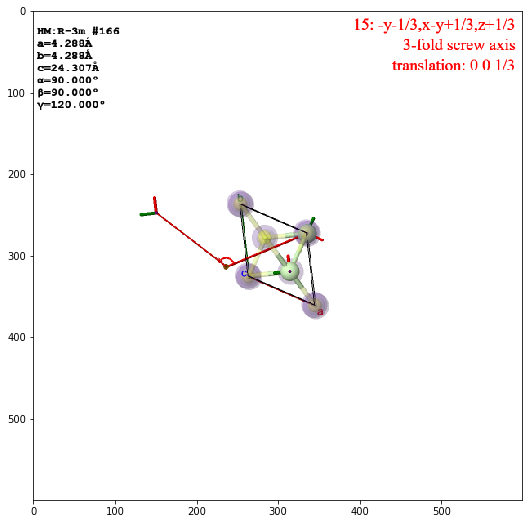

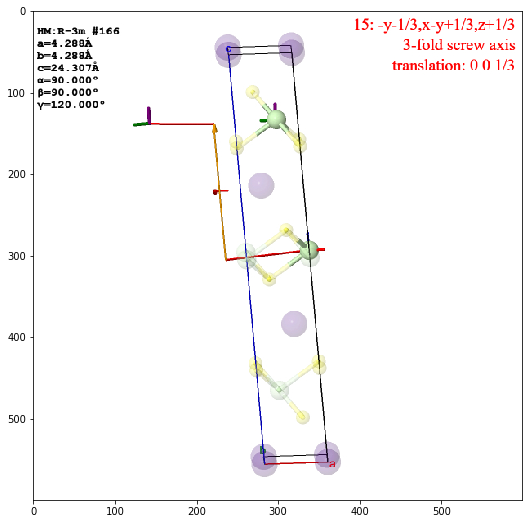


Troisième opération de symétrie :

Plan de glissement de vecteur normal [1 0 0] et de vecteur de translation [1/3 2/3 2/3] appliqué à l'atome de césium (Cs) situé en v = [0 0 1]
L'équation mathématique associée peut-être écrite comme suit :
v' =  [[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] *v +  [0.33333333 0.66666667 0.66666667]
En appliquant la rotation puis la translation, on s'aperçoit bien que l'atome est situé sur un autre site de Cs situé en v' = [2/3 1/3 1/3] dans la maille adjactente supérieure.


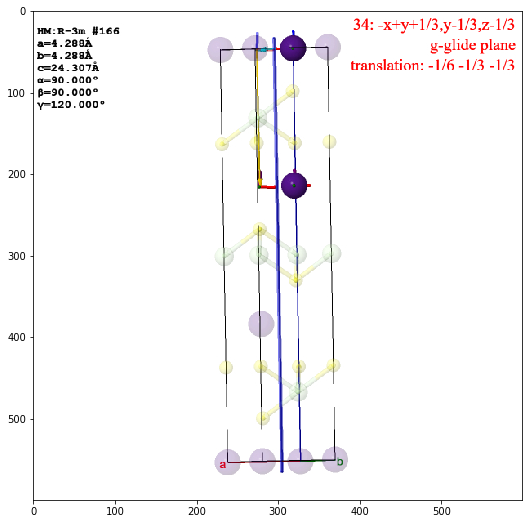

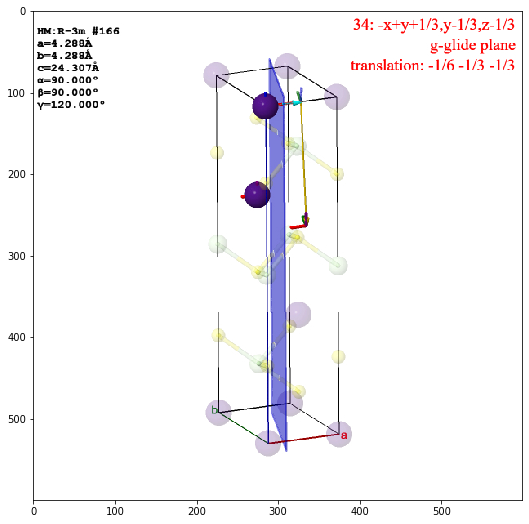

In [51]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import *
import numpy as np
with MPRester("7kc9QdoJwMtBxzFK") as m:

    print("Mon matériau est le CsPrS2")
    print()
    structure = m.get_structure_by_material_id("mp-9080")
    structure.to(filename="CsPrS2.cif")
    ConvStruct = a.get_conventional_standard_structure()
    a = SpacegroupAnalyzer(ConvStruct)
    SymList = a.get_symmetry_operations()
    #print(SpacegroupAnalyzer(ConvStruct).get_symmetry_dataset())
    TupleSites = structure.sites
    print("Pour construire la structure de la maille avec chaque atome, on récupère d'abord les coordonnées cartésiennes des atomes d'une molécule :") 
    print(TupleSites)
    #On récupère la position de chaque atome tel que répartis en partant du noeud en (0,0,0), ici la position du noeud coïncide avec le Cs
    
    latticeobj = structure.lattice
    latticematrix = latticeobj.matrix
    print("On récupère les points de la maille pour pouvoir réaliser des opérations sur tous les atomes de la maille")
    print("La position d'un atome dans une maille peut s'écrire : a*r_a + b*r_b + c*r_c + r' où r' représente la position de l'atome dans le motif et r_a,r_b,r_c les vecteurs de bases de la maille")
    print()
    veca = latticematrix[0][:]
    print("r_a = ",  veca)
    vecb = latticematrix[1][:]
    print("r_b = ",  vecb)
    vecc = latticematrix[2][:]
    print("r_c = ", vecc)
    print("en coordonnées cartésiennes, pour la suite nous travaillerons dans les coordonnées réduites pour les différents atomes, la position de l'atome sera donc notée [a,b,c] soient les projections de sa position sur les vecteurs de base.")
    print("")
    print("Le symbole du groupe de symétrie est :", a.get_space_group_symbol())
    print()
###################################################    
    Mirror = SymList[9]
    print("Première opération de symétrie :")
    print()
    print("Plan miroir de vecteur normal [1 0 0] appliqué à l'atome de praséodyme (Pr) situé en v = [2/3 1/3 83/100]")
    print("L'équation mathématique associée peut-être écrite comme suit :")
    print("v' = ",Mirror.rotation_matrix,"*v + ",Mirror.translation_vector)
    print("En appliquant la rotation puis la translation, on s'aperçoit bien que l'atome est situé sur le même site dans la maille adjacente.")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym11.png'))
    plt.show()
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym12.png'))
    plt.show()
    print()
###################################################    
    Screw = SymList[14]
    print("Seconde opération de symétrie :")
    print()
    print("Rotation hélicoïdale de [0 0 1/3] et de 120°, notée 3_1 appliquée à l'atome de praséodyme (Pr) situé en v = [1 1 1/2]")
    print("L'équation mathématique associée peut-être écrite comme suit :")
    print("v' = ",Screw.rotation_matrix,"*v + ",Screw.translation_vector)
    print("En appliquant la rotation puis la translation, on s'aperçoit bien que l'atome est situé sur un autre site de Pr situé en v' = [2/3 1/3 83/100] (soit le site de départ de la symétrie précédente) dans la maille adjacente.")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym21.png'))
    plt.show()
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym22.png'))
    plt.show()
    print()
###################################################
    Glide = SymList[33]
    print("Troisième opération de symétrie :")
    print()
    print("Plan de glissement de vecteur normal [1 0 0] et de vecteur de translation [1/3 2/3 2/3] appliqué à l'atome de césium (Cs) situé en v = [0 0 1]")
    print("L'équation mathématique associée peut-être écrite comme suit :")
    print("v' = ",Glide.rotation_matrix,"*v + ",Glide.translation_vector)
    print("En appliquant la rotation puis la translation, on s'aperçoit bien que l'atome est situé sur un autre site de Cs situé en v' = [2/3 1/3 1/3] dans la maille adjactente supérieure.")
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym31.png'))
    plt.show()
    plt.figure(figsize = (9,9))
    plt.imshow(mpimg.imread('sym32.png'))
    plt.show()
    print()